In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.models import Sequential
from keras.layers import Dense


In [9]:
# Define column names
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Load the file (replace ? and convert)
df = pd.read_csv("heart_data/processed.cleveland.data", names=columns)
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)  # You can use imputation if you want to keep all rows
df = df.apply(pd.to_numeric)

# Convert target: 0 = no disease, 1-4 = disease
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)

print("✅ Dataset loaded. Shape:", df.shape)


✅ Dataset loaded. Shape: (297, 14)


In [10]:
print(df.head())
print(df.info())
print(df["target"].value_counts())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  target  
0    3.0  0.0   6.0       0  
1    2.0  3.0   3.0       1  
2    2.0  2.0   7.0       1  
3    3.0  0.0   3.0       0  
4    1.0  0.0   3.0       0  
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-

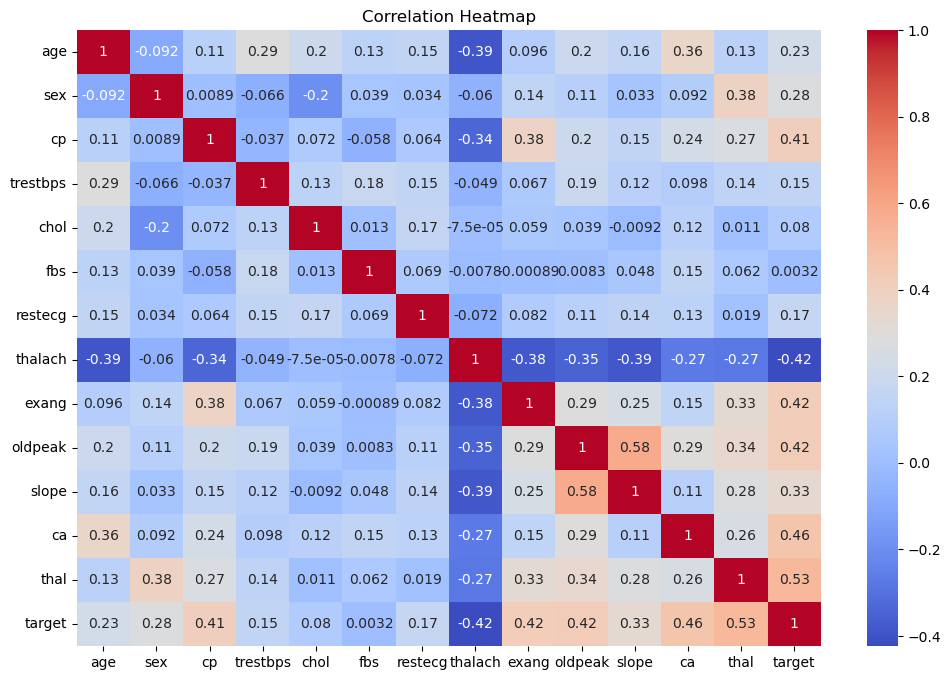

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [12]:
X = df.drop("target", axis=1)
y = df["target"]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary output


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [16]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)


Epoch 1/100
14/14 [==============================] - 3s 39ms/step - loss: 0.7756 - accuracy: 0.5023 - val_loss: 1.0012 - val_accuracy: 0.2500
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7209 - accuracy: 0.5023 - val_loss: 0.9399 - val_accuracy: 0.2500
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6812 - accuracy: 0.5070 - val_loss: 0.8941 - val_accuracy: 0.2500
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6486 - accuracy: 0.5164 - val_loss: 0.8634 - val_accuracy: 0.2500
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.6237 - accuracy: 0.5540 - val_loss: 0.8364 - val_accuracy: 0.2500
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5998 - accuracy: 0.5915 - val_loss: 0.8153 - val_accuracy: 0.3333
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.5805 - accuracy: 0.6291 - val_loss: 0.7992 - val_accuracy: 0.3333
Epoch 8/100


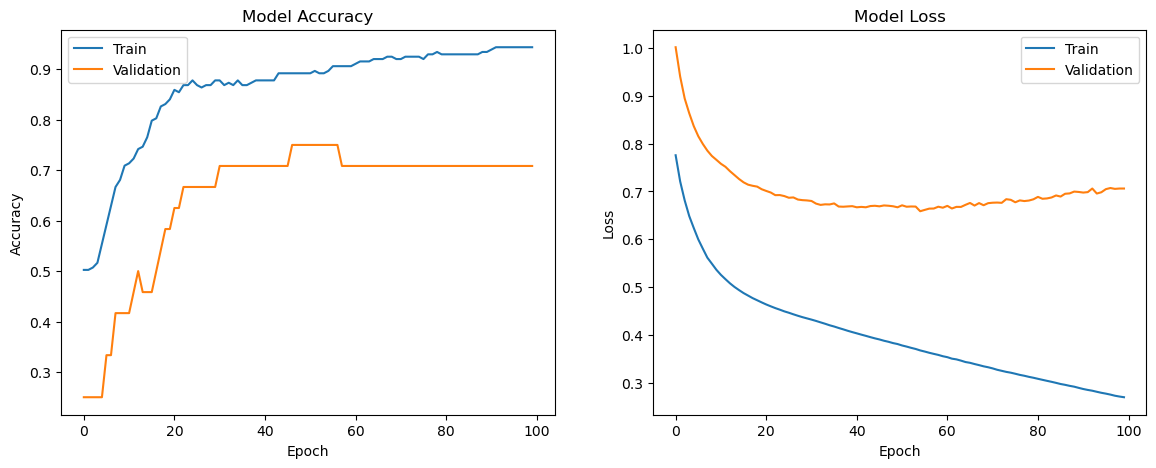

In [17]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [18]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("✅ Classification Report:\n", classification_report(y_test, y_pred))


2/2 [==============================] - 0s 6ms/step
✅ Accuracy: 0.8666666666666667
✅ Confusion Matrix:
 [[32  4]
 [ 4 20]]
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.83      0.83      0.83        24

    accuracy                           0.87        60
   macro avg       0.86      0.86      0.86        60
weighted avg       0.87      0.87      0.87        60

